<a href="https://colab.research.google.com/github/fcochaux/MINE-4101_Taller_2/blob/main/MINE_4101_Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2 de Ciencia de Datos Aplicada

**Estudiante:** Francisco José Chaux Guzmán <br/>
**Código:** 202210155 <br/>
**Programa:** Maestría en Ingeniería de la Información

## 1) Preparación del análisis

Enlace al repositorio de este taller:

In [1]:
!git clone "https://github.com/fcochaux/MINE-4101_Taller_2.git"

Cloning into 'MINE-4101_Taller_2'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


El siguiente código impide la generación de mensajes de advertencia:

In [2]:
import warnings
warnings.filterwarnings('ignore')

Carga de las librerías necesarias:

In [3]:
# procesamiento

import numpy as np
import pandas as pd

# visualización

import matplotlib.pyplot as plt
import seaborn as sns

# aprendizaje

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 2) Limpieza y preparación de datos

Se inicia con la importación del conjunto de datos. En la primera importación, se evidenció la necesidad de especificar, además del delimitador, el separador decimal. De esta forma, el procedimiento es el siguiente:

In [4]:
# lectura del conjunto de datos
df = pd.read_csv('/content/MINE-4101_Taller_2/datos/Data_Taller_2.csv', sep = ';', decimal = ',')
# convierte nombres a minúsculas
df.columns = df.columns.str.lower()
# revisa 5 casos al azar
df.sample(5)

,instant,date,season,holiday,weather,temp,feel_temp,hum,wind,casual,registered,cnt
663,664,25/10/2021,Winter,No,Mist,17.850000,16.895336,0.800417,8.333125,875,6484,7359
682,683,13/11/2021,Winter,No,Mist,8.136651,7.191575,0.662917,22.917082,327,3767,4094
323,324,20/11/2020,Winter,No,Mist + Few clouds,13.776651,13.481726,0.684583,12.458650,787,2733,3520
71,72,13/03/2020,Springer,No,Partly cloudy,10.064356,9.864277,0.527391,18.130468,982,1435,2417
173,174,23/06/2020,Fall,No,Mist + Few clouds,26.231651,24.610151,0.703333,15.999868,746,4044,4790


Al no encontrar dificultades para la importación de la información, se procede a revisar sus características:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   holiday     731 non-null    object 
 4   weather     731 non-null    object 
 5   temp        727 non-null    float64
 6   feel_temp   731 non-null    float64
 7   hum         731 non-null    float64
 8   wind        731 non-null    float64
 9   casual      731 non-null    int64  
 10  registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


El conjunto de datos contiene 731 observaciones con 12 variables. Cuatro variables son de tipo numérico entero, cuatro de tipo numérico continuo y cuatro de tipo texto. Adicionalmente, la variable `temp` (temperatura en Celsius) tiene 4 valores faltantes.

### 2.1) Revisión de duplicados

Antes de revisar duplicados, se realiza la revisión de las variables `instant` y `date` para determinar si son variables de identificación:

In [6]:
instant_ct = df[['instant']].groupby('instant')['instant'] \
                            .count() \
                            .reset_index(name='cantidad')
instant_ct['cantidad'].describe()

count    731.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: cantidad, dtype: float64

In [7]:
date_ct = df[['date']].groupby('date')['date'] \
                      .count() \
                      .reset_index(name='cantidad')
date_ct['cantidad'].describe()

count    731.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: cantidad, dtype: float64

Ningún valor se repite en ambos casos, por lo que se concluye que ambas se tratan de variables de identificación. Por esta razón, se realiza la revisión de duplicados excluyéndolas:

In [8]:
revisa = df.loc[:, ~df.columns.isin(['instant', 'date'])]
revisa[revisa.duplicated()]

,season,holiday,weather,temp,feel_temp,hum,wind,casual,registered,cnt


No existen casos duplicados.

### 2.2) Identificación de valores atípicos

Se realiza la identificación de valores atípicos en las variables numéricas. Para esto, se grafican los diagramas de caja para cada una:

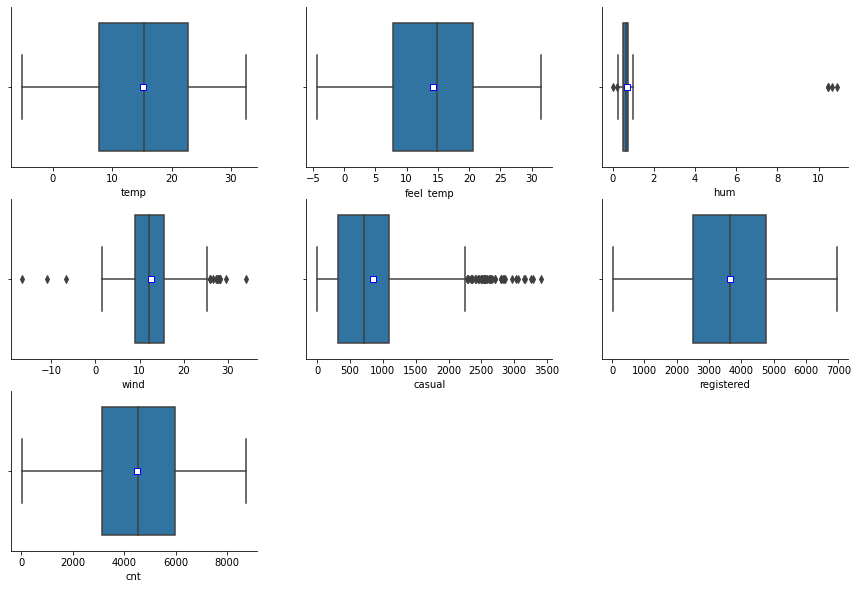

In [9]:
figure, axis = plt.subplots(3, 3, figsize=(15, 10))
sns.boxplot(df['temp'], ax=axis[0,0], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['feel_temp'], ax=axis[0,1], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['hum'], ax=axis[0,2], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['wind'], ax=axis[1,0], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['casual'], ax=axis[1,1], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['registered'], ax=axis[1,2], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['cnt'], ax=axis[2,0], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
figure.delaxes(axis[2,1])
figure.delaxes(axis[2,2])
sns.despine(figure)

Es evidente la presencia de valores atípicos en la variable `hum`, los cuales se separan tanto del resto de datos que dificultan la visualización de la caja. En `wind` y `casual` también hay valores atípicos, aunque los más marcados se encuentran en los valores más bajos de la variable `wind` y los más altos de `casual`.

Después de algunas revisiones, se decide que la mejor alternativa para detectar los valores atípicos es mediante el criterio del rango intercuartílico, ya que al basarse en la distribución de la variable, tiene un mejor potencial para identificar valores que sí sean atípicos y no solo muy grandes o muy pequeños, además de trabajar mejor con distribuciones asimétricas. Se utiliza el valor de 1.5, que es el más usado y recomendado para casos que no sean tan extremos; valores más grandes ya implicarían atípicos aún más separados.

El siguiente código identifica los atípicos y los convierte en valores faltantes, esto para el proceso de imputación que se hará posteriormente:

In [10]:
df['hum'] = df['hum'][df['hum'].between(
    df['hum'].quantile(.25) - 1.5 * (df['hum'].quantile(.75) - df['hum'].quantile(.25)),
     df['hum'].quantile(.75) + 1.5 * (df['hum'].quantile(.75) - df['hum'].quantile(.25)),
     inclusive=True)]
df['wind'] = df['wind'][df['wind'].between(
    df['wind'].quantile(.25) - 1.5 * (df['wind'].quantile(.75) - df['wind'].quantile(.25)),
     df['wind'].quantile(.75) + 1.5 * (df['wind'].quantile(.75) - df['wind'].quantile(.25)),
     inclusive=True)]
df['casual'] = df['casual'][df['casual'].between(
    df['casual'].quantile(.25) - 1.5 * (df['casual'].quantile(.75) - df['casual'].quantile(.25)),
     df['casual'].quantile(.75) + 1.5 * (df['casual'].quantile(.75) - df['casual'].quantile(.25)),
     inclusive=True)]

Se comprueba que el proceso haya sido correcto:

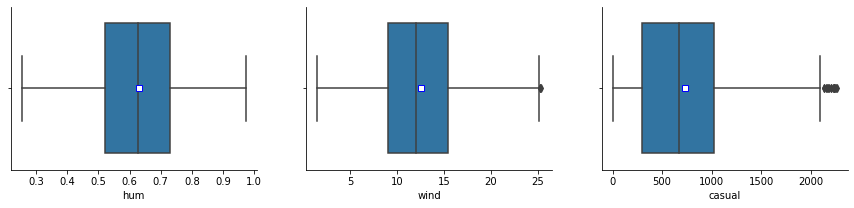

In [11]:
figure, axis = plt.subplots(1, 3, figsize=(15, 3))
sns.boxplot(df['hum'], ax=axis[0], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['wind'], ax=axis[1], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(df['casual'], ax=axis[2], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.despine(figure)

En todos los casos, se convirtieron a faltantes los atípicos de forma adecuada.

### 2.3) Imputación de valores faltantes y atípicos

A continuación, se realiza el tratamiento de los valores faltantes de `temp` y los valores atípicos de `hum`, `wind` y `casual`. Con el siguiente código, se verifica que la cantidad de valores a imputar no supera el 7% en ningún caso:

In [12]:
valor = df['temp'].isna().sum() / df.shape[0] * 100
print(f'Temp: {valor:10.2f}%')
valor = df['hum'].isna().sum() / df.shape[0] * 100
print(f'Hum: {valor:10.2f}%')
valor = df['wind'].isna().sum() / df.shape[0] * 100
print(f'Wind: {valor:10.2f}%')
valor = df['casual'].isna().sum() / df.shape[0] * 100
print(f'Casual: {valor:10.2f}%')

Temp:       0.55%
Hum:       0.82%
Wind:       2.19%
Casual:       6.02%


Esto significa que, más allá de la poca cantidad de datos y los requerimientos dados en el planteamiento del taller, la poca cantidad de atípicos identificados da confianza de que el proceso de imputación no generará un sesgo significativo sobre los cálculos.

Para saber cuál es el mejor método de imputación, se revisan las características distribucionales de las variables. Ya se realizó la revisión de los diagramas de caja, por lo que se complementa con la revisión de los histogramas:

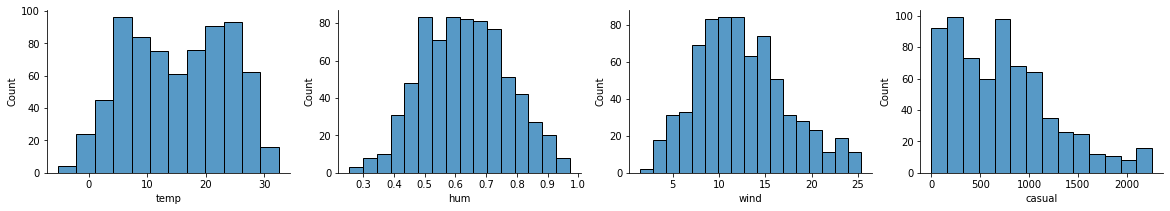

In [13]:
figure, axis = plt.subplots(1, 4, figsize=(20, 3))
sns.histplot(df['temp'], ax=axis[0])
sns.histplot(df['hum'], ax=axis[1])
sns.histplot(df['wind'], ax=axis[2])
sns.histplot(df['casual'], ax=axis[3])
sns.despine(figure)

Se observa lo siguiente:

- La variable `temp` tiene una distribución bimodal, lo que significa que una imputación usando una medida simple (p.ej. media o mediana) puede resultar problemática. En este caso, lo mejor es una medida condicionada que capture la heterogeneidad de modas que provoca esta distribución.
- Las variables `hum` y `wind` tienen distribuciones casi simétricas, por lo que una imputación por el promedio funcionará en ambos casos.
- La variable `casual` es asimétrica hacia la izquierda. En este caso, con base en el diagrama de caja visto anteriormente (con una mediana inferior a la media), se concluye que lo mejor es imputar por la mediana.

Para la imputación de `temp`, se revisaron las variables categóricas para los casos con faltantes:

In [14]:
faltantes = df[df['temp'].isnull()]
faltantes[['season','holiday','weather']]

,season,holiday,weather
99,Summer,No,Mist + Few clouds
229,Fall,No,Partly cloudy
562,Fall,No,Clear
721,Springer,No,Partly cloudy


Se descarta la variable `holiday` porque tiene un solo caso.

Para saber si es mejor la variable `season` o `weather`, se revisan sus categorías:

In [15]:
df[['season']].groupby('season')['season'] \
              .count() \
              .reset_index(name='cantidad')

,season,cantidad
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


In [16]:
df[['weather']].groupby('weather')['weather'] \
               .count() \
               .reset_index(name='cantidad')

,weather,cantidad
0,Partly cloudy,128
1,Partly cloudy,106
2,Clear,111
3,Few clouds,118
4,Light Rain + Scattered clouds,8
5,Mist,54
6,Mist + Broken clouds,69
7,Mist + Cloudy,66
8,Mist + Few clouds,58
9,Rain + Thunderstorm,7


Al parecer, es sensato utilizar una medida condicionada a las variables `season` y `weather`, ya que las categorías que harían parte de la imputación parecen tener tamaños adecuados. Antes, se corrige la categoría repetida en la variable `weather`, para lo cuál se revisa cómo se ven exactamente las categorías:

In [17]:
df['weather'].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

Las categorías repetidas se deben a espacios adicionales, de forma que se eliminan para dejar una única categoría:

In [18]:
df['weather'] = df['weather'].replace(' Partly    cloudy',  'Partly cloudy')
df['weather'] = df['weather'].replace(' Partly cloudy',  'Partly cloudy')
df[['weather']].groupby('weather')['weather'] \
               .count() \
               .reset_index(name='cantidad')

,weather,cantidad
0,Clear,111
1,Few clouds,118
2,Light Rain + Scattered clouds,8
3,Mist,54
4,Mist + Broken clouds,69
5,Mist + Cloudy,66
6,Mist + Few clouds,58
7,Partly cloudy,234
8,Rain + Thunderstorm,7
9,Snow,6


Una vez resuelta la inconsistencia, se calculan la media y mediana de la variable por categoría, antes de decir cuál usar:

In [19]:
# separo no faltantes
nofaltantes = df[~df['temp'].isnull()]
# cálculo de medias
medias = nofaltantes.groupby(['season', 'weather'])['temp'] \
                    .mean() \
                    .reset_index(name='media')
# cálculo de medianas
medianas = nofaltantes.groupby(['season', 'weather'])['temp'] \
                      .median() \
                      .reset_index(name='mediana')
# unión de medidas
medidas = medias.merge(medianas, on = ['season','weather'])
# revisión de casos de interés
medidas[medidas['weather'].isin(faltantes['weather']) & medidas['season'].isin(faltantes['season'])]

,season,weather,media,mediana
0,Fall,Clear,25.077652,25.781250
6,Fall,Mist + Few clouds,23.418786,23.960000
9,Springer,Clear,5.191851,5.160000
15,Springer,Mist + Few clouds,5.632328,4.298349
19,Summer,Clear,18.885308,20.356674
25,Summer,Mist + Few clouds,17.825077,17.419151


Como no hay mucha diferencia entre medias y medianas, se utilizan las medias para imputar:

In [20]:
# cálculo de medias
medias = df.groupby(['season', 'weather'])['temp'] \
           .mean() \
           .reset_index(name='mean_temp')
# imputación
df = df.merge(medias, on = ['season','weather'])
df['temp'] = df.apply(
    lambda row: row['mean_temp'] if np.isnan(row['temp']) else row['temp'],
    axis=1
)
del df['mean_temp']
# revisión
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   holiday     731 non-null    object 
 4   weather     731 non-null    object 
 5   temp        731 non-null    float64
 6   feel_temp   731 non-null    float64
 7   hum         725 non-null    float64
 8   wind        715 non-null    float64
 9   casual      687 non-null    float64
 10  registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 74.2+ KB


Para imputar `hum` y `wind`, se usa el promedio:

In [21]:
# hum
nofaltantes = df[~df['hum'].isnull()]
df['hum'].fillna(value=nofaltantes['hum'].mean(), inplace=True)
# wind
nofaltantes = df[~df['wind'].isnull()]
df['wind'].fillna(value=nofaltantes['wind'].mean(), inplace=True)
# verificación
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   holiday     731 non-null    object 
 4   weather     731 non-null    object 
 5   temp        731 non-null    float64
 6   feel_temp   731 non-null    float64
 7   hum         731 non-null    float64
 8   wind        731 non-null    float64
 9   casual      687 non-null    float64
 10  registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 74.2+ KB


Para imputar `casual`, se usa la mediana:

In [22]:
nofaltantes = df[~df['casual'].isnull()]
df['casual'].fillna(value=nofaltantes['casual'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   holiday     731 non-null    object 
 4   weather     731 non-null    object 
 5   temp        731 non-null    float64
 6   feel_temp   731 non-null    float64
 7   hum         731 non-null    float64
 8   wind        731 non-null    float64
 9   casual      731 non-null    float64
 10  registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 74.2+ KB


Por lo tanto, ya no existen valores faltantes o atípicos, ya que estos fueron imputados.

### 2.4) Conversión de variables categóricas

Finalmente, para poder incluir las variables categóricas al algoritmo de regresión, estas deben convertirse en variables dicotómicas (dummies). Antes de hacerlo, se sigue la recomendación del meteorólogo de agrupar precipitaciones con niebla y sin niebla en distintos grupos. Entonces, se hace lo siguiente:

In [23]:
df['weather'] = np.where(df['weather'].str.contains('Mist'), 'Mist', 'Other')

Así, se generan las variables dicotómicas:

In [24]:
df = pd.get_dummies(df, prefix='season', columns=['season'], prefix_sep = ' ', drop_first=True)
df = pd.get_dummies(df, prefix='weather', columns=['weather'], prefix_sep = ' ', drop_first=True)
df = pd.get_dummies(df, prefix='holiday', columns=['holiday'], prefix_sep = ' ', drop_first=True)
df.columns = df.columns.str.lower()
df.head()

,instant,date,temp,feel_temp,hum,wind,casual,registered,cnt,season springer,season summer,season winter,weather other,holiday yes
0,1,1/01/2020,8.175849,9.090375,0.805833,10.749882,331.0,654,985,1,0,0,0,0
1,2,2/01/2020,9.083466,8.625733,0.696087,12.492708,131.0,670,801,1,0,0,0,0
2,20,20/01/2020,4.298349,3.987350,0.538333,13.125568,83.0,1844,1927,1,0,0,0,0
3,52,21/02/2020,6.256651,5.351525,0.605000,20.625682,195.0,912,1107,1,0,0,0,1
4,56,25/02/2020,9.124356,8.471667,0.712174,23.218113,120.0,1341,1461,1,0,0,0,0


De esta forma, ya se tiene listo el conjunto de datos para los análisis que siguen.

## 3) Análisis de datos

Para la detección de los valores atípicos, se hizo la revisión de la distribución de las variables. A continuación, se revisan los diagramas de puntos entre cada una de las variables numéricas (sin incluir dicotómicas):

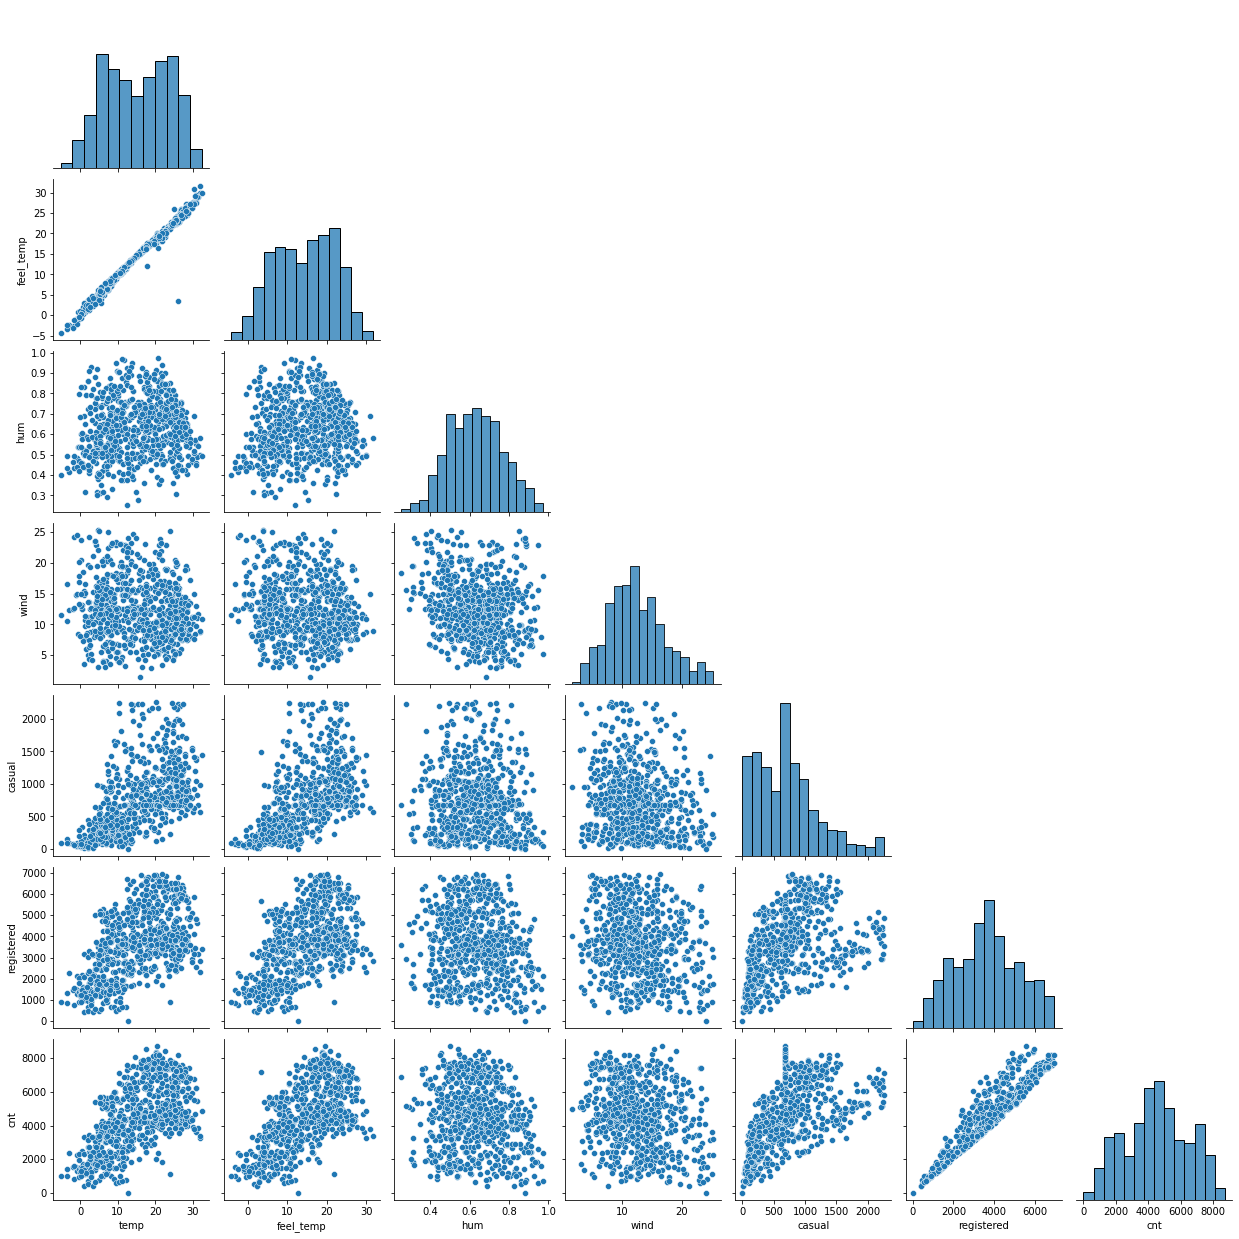

In [25]:
sns.pairplot(df.loc[:, df.columns.isin(['cnt','temp','feel_temp','hum','wind',
                                        'casual','registered'])], corner=True)

Lo primero que llama la atención es que la relación entre `temp` y `feel_temp` es perfectamente lineal, lo que hace pensar en una correlación muy alta (que ya se revisará) que, eventualmente, puede llevar a dejar solo una de las variables.

Respecto a la relación de la variable objetivo `cnt` con respecto a las demás, parece tener una relación lineal con `temp`, `feel_temp` y `registered`. Con `casual` parece haber, más bien, una relación no lineal. Finalmente, con `hum` y `wind` parece tener una relación decreciente, pero no muy fuerte debido a la dispersión.

Volviendo a la variable `casual`, llama la atención que tiene una fuerte asimetría hacia la izquierda, la cual contrasta con las otras variables que tiene distribuciones más simétricas. Tal vez por eso la aparente no linealidad respecto a la variable objetivo.

Se revisa la matriz de correlaciones:

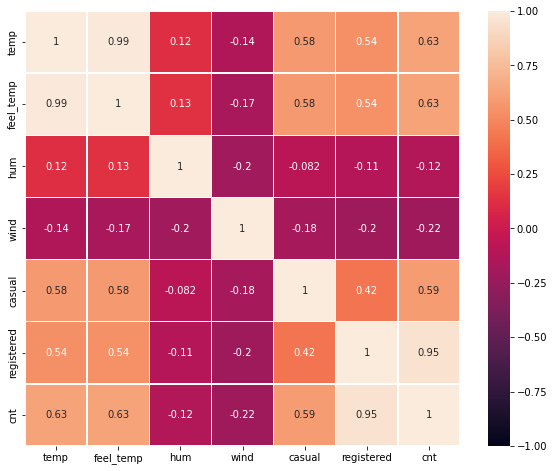

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.loc[:, df.columns.isin(['cnt','temp','feel_temp','hum','wind',
                                        'casual','registered'])].corr(),
            linewidths=.5, square=True, vmin=-1, vmax=1, annot=True)

Se verifica que la correlación entre `temp` y `feel_temp` es muy alta, lo que justifica eliminar una de estas. También se verifican las observaciones sobre la relación entre la variable objetivo y cada una de las características. También se ven algunas relaciones moderadas entre otras variables, como `casual` y `registered` con las temperaturas.

Hechas estas observaciones, se procede a eliminar la variable `feel_temp`:

In [27]:
del df['feel_temp']

## 4) Desarrollo de modelos de Machine Learning

Se inicia con la separacción de la variable objetivo de las demás, además de los conjuntos de entrenamiento y prueba:

In [28]:
# separación de variable objetivo y atributos
y = df['cnt']
x = df.loc[:, ~df.columns.isin(['cnt','instant', 'date'])]
# separación entrenamiento y prueba
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(
    x, y, test_size = 0.2, random_state = 232435
    )

A continuación, se realiza la estandarización de características:

In [29]:
scaler = StandardScaler()
x_entrenamiento_escalado = scaler.fit_transform(x_entrenamiento)
x_prueba_escalado = scaler.transform(x_prueba)

### 4.1) Regresión lineal simple

Se realiza el ajuste del modelo:

In [30]:
regr1 = LinearRegression()
regr1.fit(x_entrenamiento_escalado, y_entrenamiento)

LinearRegression()

### 4.2) Regresión lineal polinomial

Se decide realizar transformación de los datos a polinomios de grado 5:

In [31]:
polinomio = PolynomialFeatures(degree=5, include_bias = False)
x_entrenamiento_polinomio = polinomio.fit_transform(x_entrenamiento_escalado)
x_prueba_polinomio = polinomio.fit_transform(x_prueba_escalado)

Se realiza el ajuste:

In [32]:
regr2 = LinearRegression()
regr2.fit(x_entrenamiento_polinomio, y_entrenamiento)

LinearRegression()

### 4.3) Regresión lineal con regularización

Partiendo de los polinomios de grado 5, se incluye una regularización Ridge con $\alpha=0.7$:

In [33]:
regr3 = Ridge(alpha=0.7, solver='cholesky')
regr3.fit(x_entrenamiento_polinomio,y_entrenamiento)

Ridge(alpha=0.7, solver='cholesky')

## 5) Evaluación de modelos

A continuación, se calcula la medida utilizada como función de costo: la raíz del error cuadrático medio.

In [34]:
# regresión lineal simple
predice_entrenamiento1 = regr1.predict(x_entrenamiento_escalado)
predice_prueba1 = regr1.predict(x_prueba_escalado)
# regresión lineal polinomial
predice_entrenamiento2 = regr2.predict(x_entrenamiento_polinomio)
predice_prueba2 = regr2.predict(x_prueba_polinomio)
# regresión lineal polinomial con regularización Ridge
predice_entrenamiento3 = regr3.predict(x_entrenamiento_polinomio)
predice_prueba3 = regr3.predict(x_prueba_polinomio)
# cálculo de medidas
print(f'Modelo 1:\n\tEntrenamiento: {np.sqrt(mean_squared_error(y_entrenamiento, predice_entrenamiento1))}\n\tPrueba: {np.sqrt(mean_squared_error(y_prueba, predice_prueba1))}')
print(f'Modelo 2:\n\tEntrenamiento: {np.sqrt(mean_squared_error(y_entrenamiento, predice_entrenamiento2))}\n\tPrueba: {np.sqrt(mean_squared_error(y_prueba, predice_prueba2))}')
print(f'Modelo 3:\n\tEntrenamiento: {np.sqrt(mean_squared_error(y_entrenamiento, predice_entrenamiento3))}\n\tPrueba: {np.sqrt(mean_squared_error(y_prueba, predice_prueba3))}')

Modelo 1:
	Entrenamiento: 466.6317685320158
	Prueba: 418.5872706815299
Modelo 2:
	Entrenamiento: 1.732836412331795e-10
	Prueba: 6036.516490213205
Modelo 3:
	Entrenamiento: 83.82922343623704
	Prueba: 2148.2141758413804


Se observa que el modelo 1 parece cometer más errores con el conjunto de entrenamiento, pero menos con el de prueba. Esto contrasta con los modelos 2 y 3, en los cuales parece haber sobreajuste ya que comete pocos errores con el conjunto de entrenamiento pero muchos con el de prueba, lo que implica que ante nuevos datos, los modelos tiene mayores niveles de error.

En este sentido, se recomienda el uso del primer modelo para conocer la predicción del uso total de bicicletas.

## 6) Interpretación

Para saber cuáles son las variables más importantes, se revisan los coeficientes de la regresión:

In [35]:
coef_dict = {}
for coef, feat in zip(regr1.coef_,x_entrenamiento.columns):
    coef_dict[feat] = coef
coef_dict

{'temp': 143.02830862832823,
 'hum': -60.088291007351586,
 'wind': -30.78182560856571,
 'casual': 385.78233843024685,
 'registered': 1591.9892177502836,
 'season springer': 6.865903468074066,
 'season summer': 72.91930856442823,
 'season winter': 26.033948466538703,
 'weather other': -8.653502868277243,
 'holiday yes': 31.512754279876184}

De acuerdo a los coeficientes, las variables que más importantes son `registered` (cantidad de usuarios registrados), `casual` (cantidad de usuarios casuales) y `temp` (temperatura en Celsius).

El escenario ideal para el incremento de usuarios será aquel en el cual la estación sea verano, el viento y la humedad sean bajos, la temperatura sea alta y sea un día festivo. Curiosamente, parece que la presencia de niebla aumenta la cantidad de usuarios.

Para un próximo modelo se puede revisar con cuidado en qué casos la variable objetivo, simultaneamente, tiene incidencia en alguna de las características, principalmente para variables que describen las cantidades de usuarios.